In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train_data=pd.read_excel("Data_Train.xlsx")
test_data=pd.read_excel("Data_Test.xlsx")
final_data=pd.read_excel("Data_Test.xlsx")

In [3]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [6]:
test_data.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [7]:
train_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [9]:
test_data[test_data['Power']=='null bhp']['Power'].count()

22

In [10]:
train_data[train_data['Power']=='null bhp']['Power'].count()

107

In [11]:
train_data['Power']=train_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
test_data['Power']=test_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
train_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [12]:
test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                32
Seats                11
dtype: int64

In [13]:
train_data['Mileage'].fillna(train_data['Mileage'].mode()[0] , inplace = True)
train_data['Engine'].fillna(train_data['Engine'].mode()[0] , inplace = True)
train_data['Power'].fillna(train_data['Power'].mode()[0] , inplace = True)
train_data['Seats'].fillna(train_data['Seats'].mode()[0] , inplace = True)
train_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
test_data['Engine'].fillna(test_data['Engine'].mode()[0] , inplace = True)
test_data['Power'].fillna(test_data['Power'].mode()[0] , inplace = True)
test_data['Seats'].fillna(test_data['Seats'].mode()[0] , inplace = True)
test_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [15]:
#removing the units in some columns of the  training dataset
train_data['Mileage'] = train_data['Mileage'].str.split(" " , expand = True)
train_data['Mileage'] = train_data['Mileage'].astype("float")
#repeatig the above steps for the other columns
train_data['Engine'] = train_data['Engine'].str.split(" " , expand = True)
train_data['Engine'] = train_data['Engine'].astype("float")
train_data['Power'] = train_data['Power'].str.split(" " , expand = True)
train_data['Power'] = train_data['Power'].astype("float")
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [16]:
#removing the units in some columns of the testing dataset
test_data['Mileage'] = test_data['Mileage'].str.split(" " , expand = True)
test_data['Mileage'] = test_data['Mileage'].astype("float")
test_data['Engine'] = test_data['Engine'].str.split(" " , expand = True)
test_data['Engine'] = test_data['Engine'].astype("float")
test_data['Power'] = test_data['Power'].str.split(" " , expand = True)
test_data['Power'] = test_data['Power'].astype("float")
test_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,74.00,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0


In [17]:
#Let us check the name variable 
print("The total number of unqiue car :",str(len(train_data['Name'].unique())))

The total number of unqiue car : 1876


In [18]:
#since there are 1876 car and it will be diffcult upon us to study each car type and the realation
#with other vairables lets define a new column with the name brand
train_data['Brand']=train_data['Name'].str.split(" ",2)
x=pd.DataFrame(train_data['Brand'])
train_data['Brand']=x['Brand'].str.get(0)
train_data['Model']=x['Brand'].str.get(1)
print("The car brands are: ",train_data['Brand'].unique())
print("The total number of unqiue car Brands :",str(len(train_data['Brand'].unique())))
print("The car brands are: ",train_data['Model'].unique())
print("The total number of unqiue car Brands :",str(len(train_data['Model'].unique())))

The car brands are:  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
The total number of unqiue car Brands : 31
The car brands are:  ['Wagon' 'Creta' 'Jazz' 'Ertiga' 'A4' 'EON' 'Micra' 'Innova' 'Vento'
 'Indica' 'Ciaz' 'City' 'Swift' 'Rover' 'Pajero' 'Amaze' 'Duster' 'New'
 '3' 'S' 'A6' 'i20' 'Alto' 'WRV' 'Corolla' 'Ssangyong' 'Vitara' 'KUV'
 'M-Class' 'Polo' 'Nano' 'Elantra' 'Xcent' 'Thar' 'Grand' 'KWID' 'i10'
 'X-Trail' 'Zen' 'Figo' 'C-Class' 'Cayenne' 'XUV500' 'Terrano' 'Brio'
 'Fiesta' 'Santro' 'Zest' 'Ritz' '5' 'Fortuner' 'Ecosport' 'Verna' 'GO'
 'Omni' 'Etios' 'XF' 'Eeco' 'Civic' 'V40' 'B' 'Scorpio' 'CR-V' 'SLC' '1'
 'Beat' 'Rapid' 'RS5' 'Superb' 'X5' 'GLC' 'Countryman' 'Optra' 'Lodgy'
 'E-Class' 'Baleno' 'Laura' 'NuvoSport' 'Fabia' 'Indi

In [19]:
train_data.Brand[train_data.Brand == 'Isuzu'] = 'ISUZU'
print("The total number of unqiue car Brands :",str(len(train_data['Brand'].unique())))

The total number of unqiue car Brands : 30


C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
training_set=train_data
test_set=test_data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
 13  Model              6019 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 658.5+ KB


# Exploratory Data Analysis

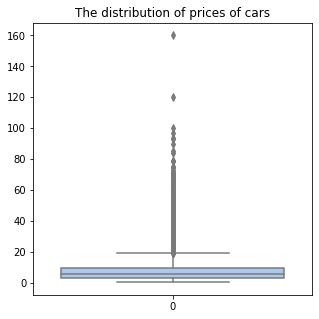

In [21]:
plt.rcParams["figure.figsize"]=[5,5]
plt.title("The distribution of prices of cars")
#for checking outliers if they exist
sns.boxplot(data=train_data['Price'],palette="pastel")

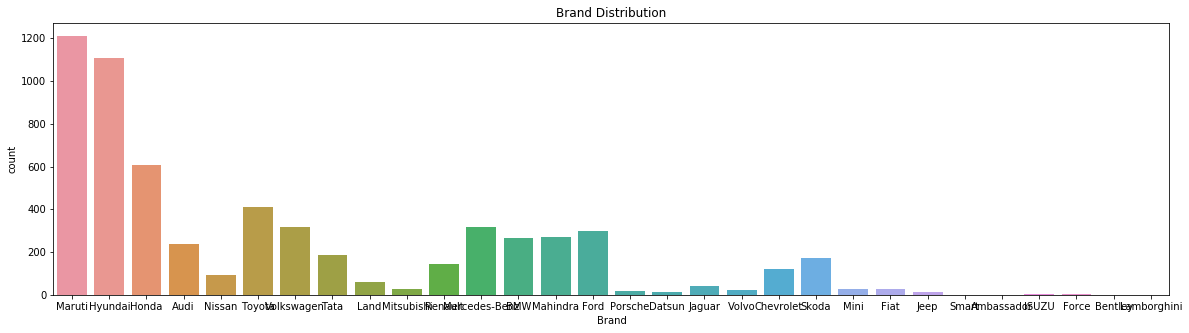

In [22]:
#We make use of pie charts to represent the fields in each category
plt.figure(figsize=(20,5))

c1=['orange','skyblue','yellow','lawngreen','violet','gold',]
c2=['hotpink','lime','red','sandybrown','grey']
plt.title("Brand Distribution")
sns.countplot(x=train_data['Brand'])

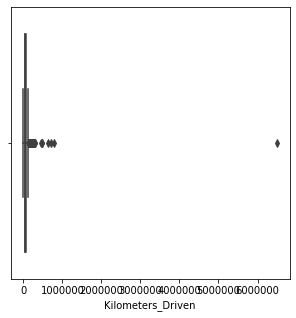

In [23]:
sns.boxplot(x=train_data['Kilometers_Driven'])

C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


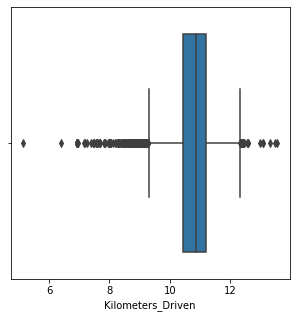

In [24]:
train_data['Kilometers_Driven'].astype('float64')
train_data['Kilometers_Driven']=train_data['Kilometers_Driven'].apply(lambda x: x if x <= 6000000 else -1)
train_data=train_data[train_data['Kilometers_Driven']!=-1]
train_data['Kilometers_Driven']=np.log(train_data['Kilometers_Driven'])
sns.boxplot(train_data['Kilometers_Driven'])

Text(0.5, 1.0, 'Seats distribution')

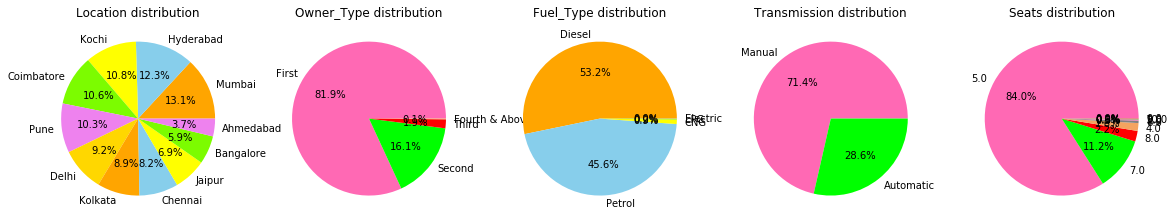

In [25]:
c1=['orange','skyblue','yellow','lawngreen','violet','gold',]
c2=['hotpink','lime','red','sandybrown','grey']
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
glab=train_data['Location'].value_counts().index
gval=train_data['Location'].value_counts().values
plt.pie(gval,labels=glab,colors=c1,autopct='%1.1f%%')
plt.title("Location distribution")
plt.subplot(1,5,2)
glab=train_data['Owner_Type'].value_counts().index
gval=train_data['Owner_Type'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Owner_Type distribution")
plt.subplot(1,5,3)
glab=train_data['Fuel_Type'].value_counts().index
gval=train_data['Fuel_Type'].value_counts().values
plt.pie(gval,labels=glab,colors=c1,autopct='%1.1f%%')
plt.title("Fuel_Type distribution")
plt.subplot(1,5,4)
glab=train_data['Transmission'].value_counts().index
gval=train_data['Transmission'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Transmission distribution")
plt.subplot(1,5,5)
glab=train_data['Seats'].value_counts().index
gval=train_data['Seats'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Seats distribution")

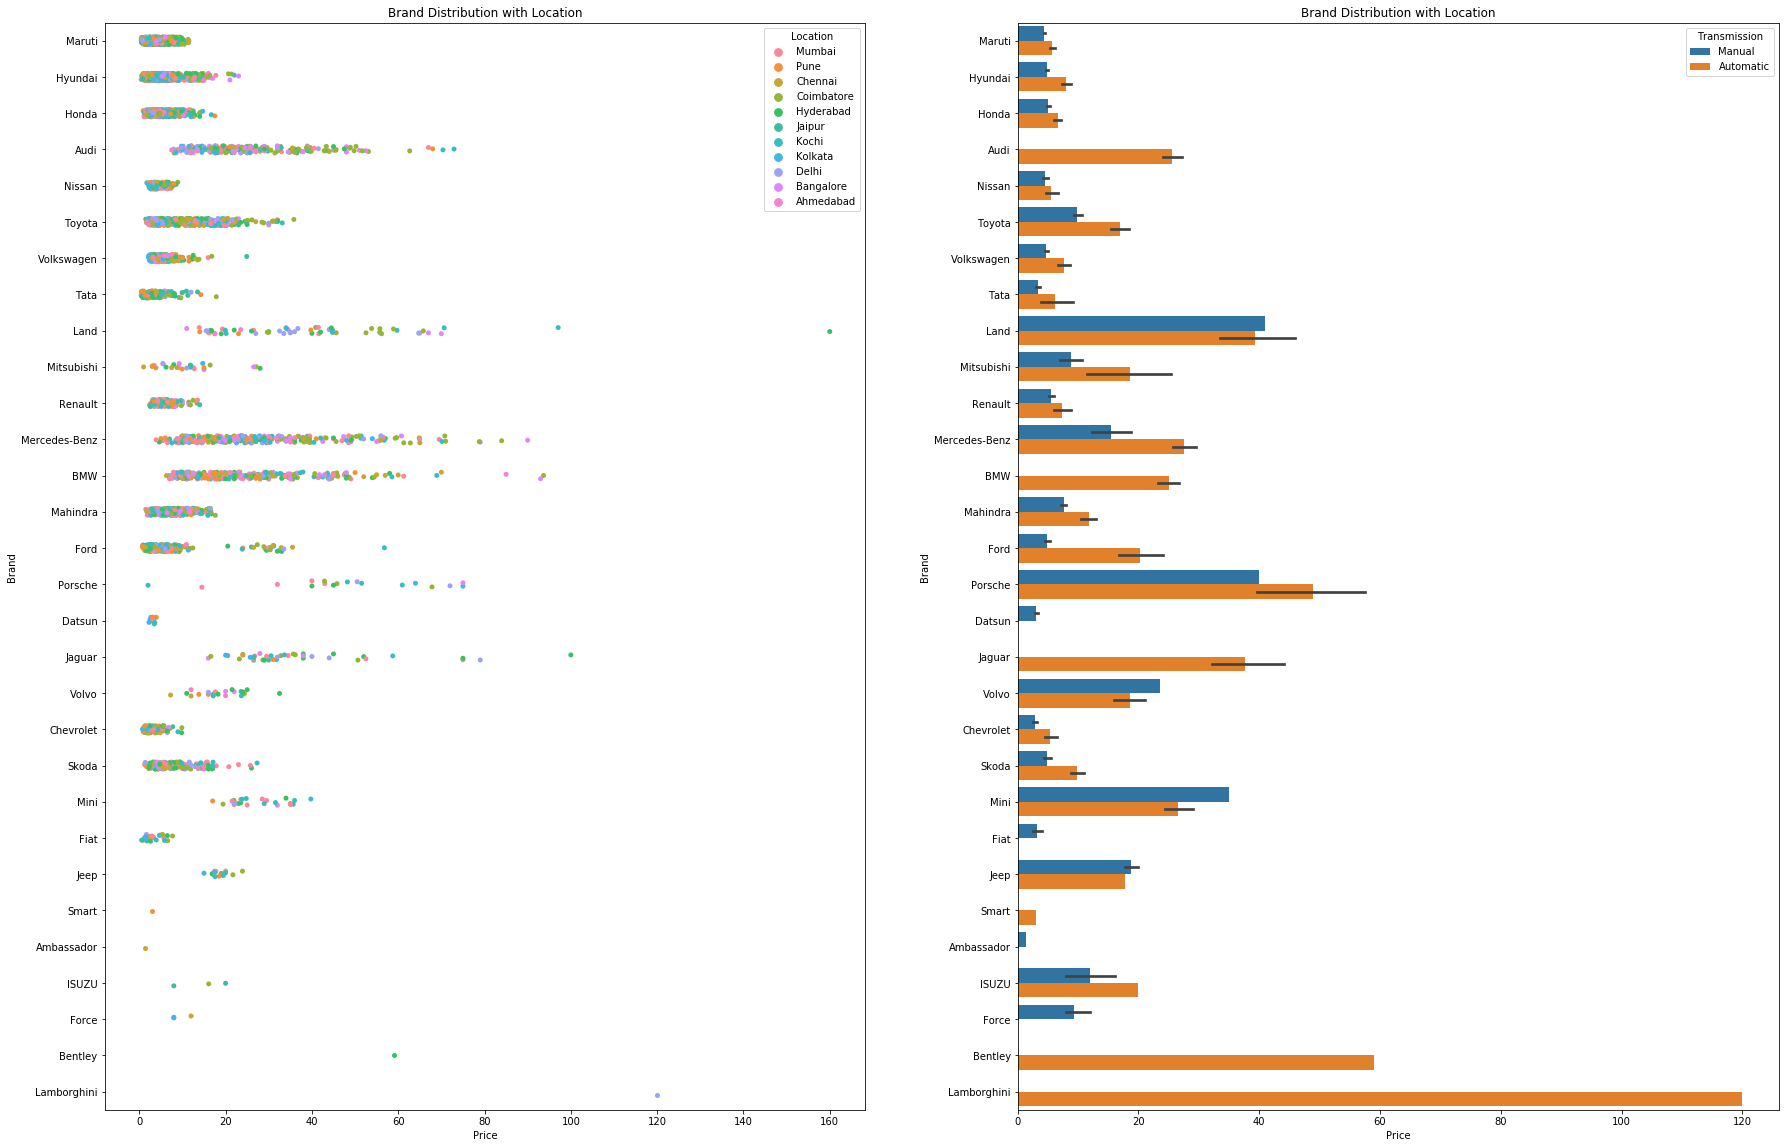

In [26]:
#Cars price based on their brand  with influence of location
plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.title("Brand Distribution with Location")
sns.stripplot(y=train_data['Brand'],x=train_data['Price'],hue=train_data['Location'])
plt.subplot(1,2,2)
plt.title("Brand Distribution with Location")
sns.barplot(y=train_data['Brand'],x=train_data['Price'],hue=train_data['Transmission'])

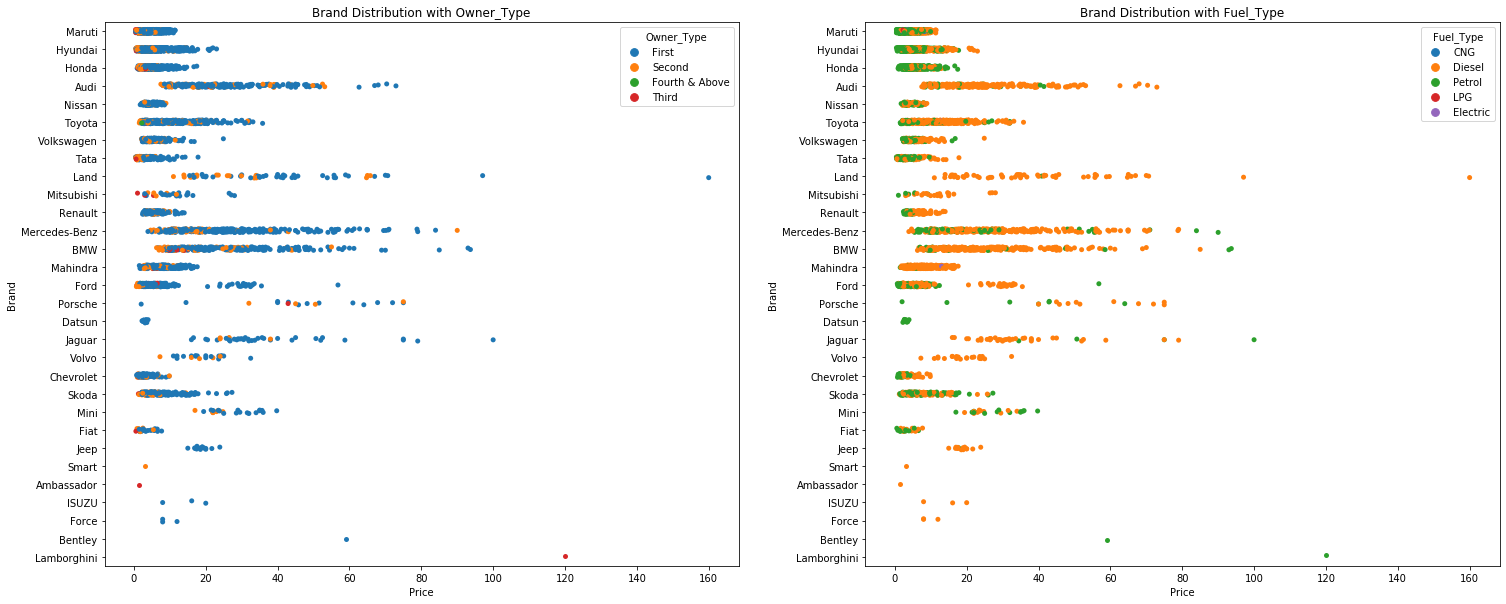

In [27]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("Brand Distribution with Owner_Type")
sns.stripplot(y=train_data['Brand'],x=train_data['Price'],hue=train_data['Owner_Type'])
plt.subplot(1,2,2)
plt.title("Brand Distribution with Fuel_Type")
sns.stripplot(y=train_data['Brand'],x=train_data['Price'],hue=train_data['Fuel_Type'])

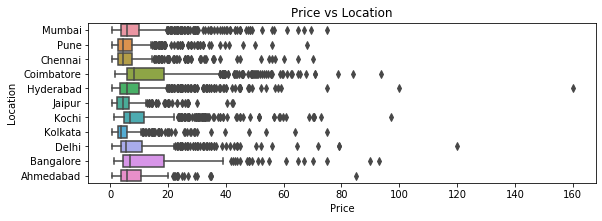

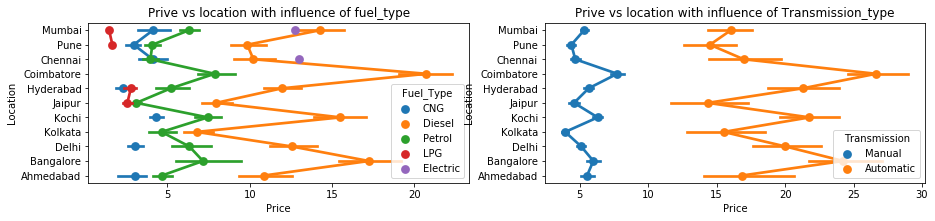

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.title("Price vs Location")
sns.boxplot(y=train_data['Location'],x=train_data['Price'])
plt.figure(figsize=(15,10))
plt.subplot(3,2,3)
plt.title("Prive vs location with influence of fuel_type")
sns.pointplot(y=train_data['Location'],x=train_data['Price'],hue=train_data["Fuel_Type"])
plt.subplot(3,2,4)
plt.title("Prive vs location with influence of Transmission_type")
sns.pointplot(y=train_data['Location'],x=train_data['Price'],hue=train_data["Transmission"])

Text(0.5, 1.0, 'Price vs location with influence of Owner_type')

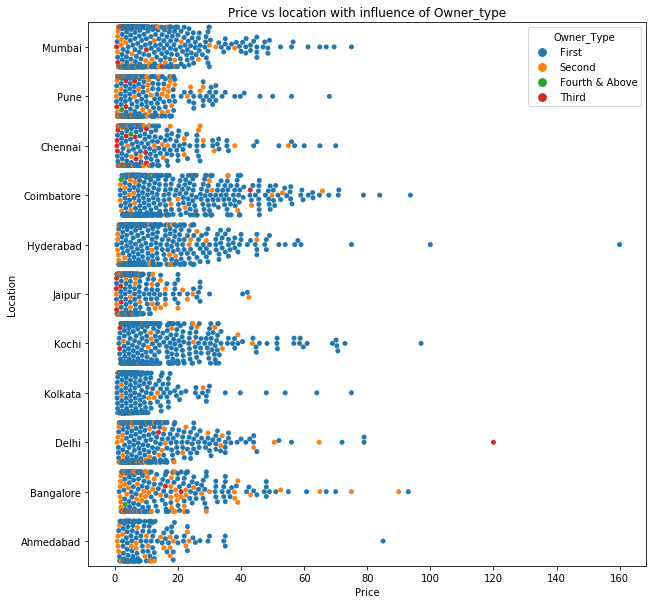

In [29]:
plt.figure(figsize=(10,10))
sns.swarmplot(y=train_data['Location'],x=train_data['Price'],hue=train_data["Owner_Type"])
plt.title("Price vs location with influence of Owner_type")

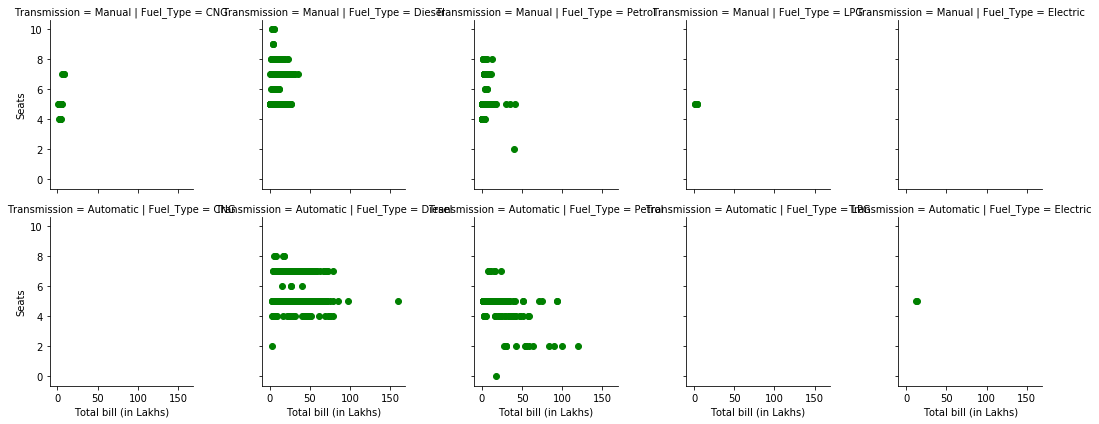

In [30]:
g = sns.FacetGrid(train_data, col="Fuel_Type", row="Transmission")
g = (g.map(plt.scatter, "Price", "Seats", color="g")
      .set_axis_labels("Total bill (in Lakhs)", "Seats"))

In [31]:
Owners = {'First': 1,'Second': 2,'Fourth & Above': 4, 'Third': 3}
train_data['Owners'] = [Owners[item] for item in train_data['Owner_Type']]
train_data

C:\Users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Owners
0,Maruti Wagon R LXI CNG,Mumbai,2010,11.184421,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1
2,Honda Jazz V,Chennai,2011,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,1
3,Maruti Ertiga VDI,Chennai,2012,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,10.217020,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift,1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,11.512925,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,10.915088,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo,2
6017,Maruti Wagon R VXI,Kolkata,2013,10.736397,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon,1


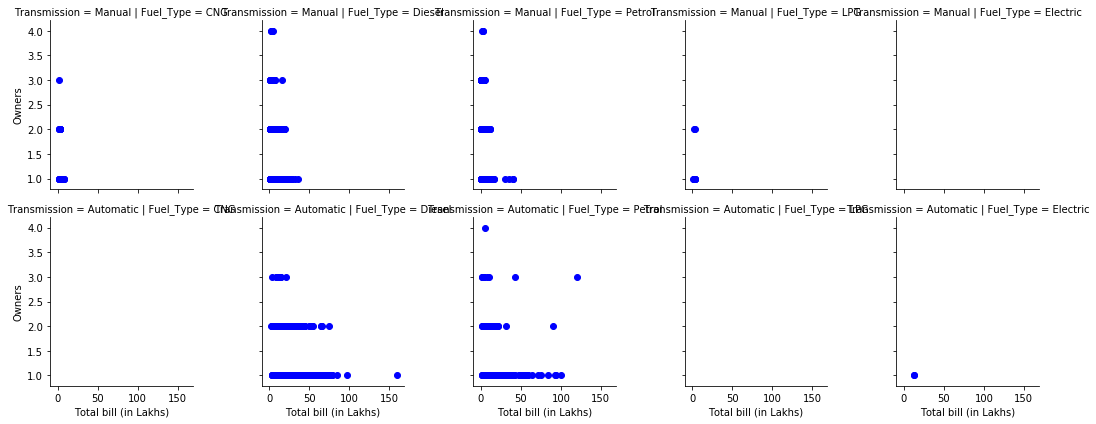

In [32]:
g = sns.FacetGrid(train_data, col="Fuel_Type", row="Transmission")
g = (g.map(plt.scatter, "Price", "Owners", color="b")
      .set_axis_labels("Total bill (in Lakhs)", "Owners"))

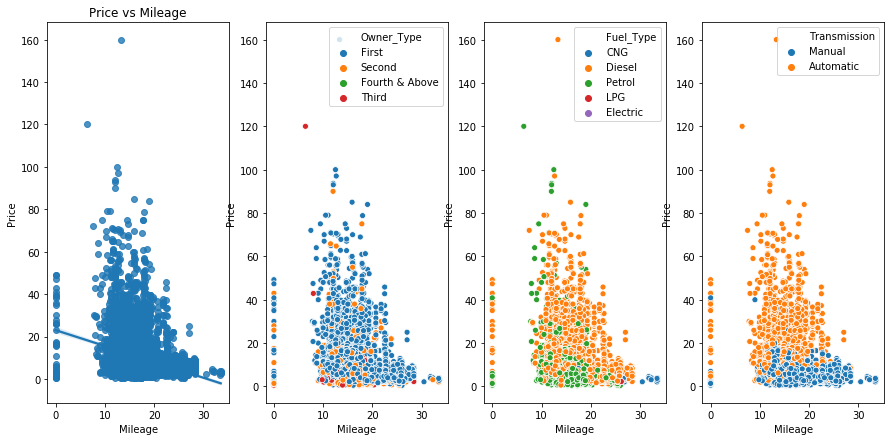

In [33]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sns.regplot(x=train_data['Mileage'],y=train_data['Price'])
plt.title("Price vs Mileage")
plt.subplot(1,4,2)
sns.scatterplot(x=train_data['Mileage'],y=train_data['Price'],hue=train_data['Owner_Type'])
plt.subplot(1,4,3)
sns.scatterplot(x=train_data['Mileage'],y=train_data['Price'],hue=train_data['Fuel_Type'])
plt.subplot(1,4,4)
sns.scatterplot(x=train_data['Mileage'],y=train_data['Price'],hue=train_data['Transmission'])

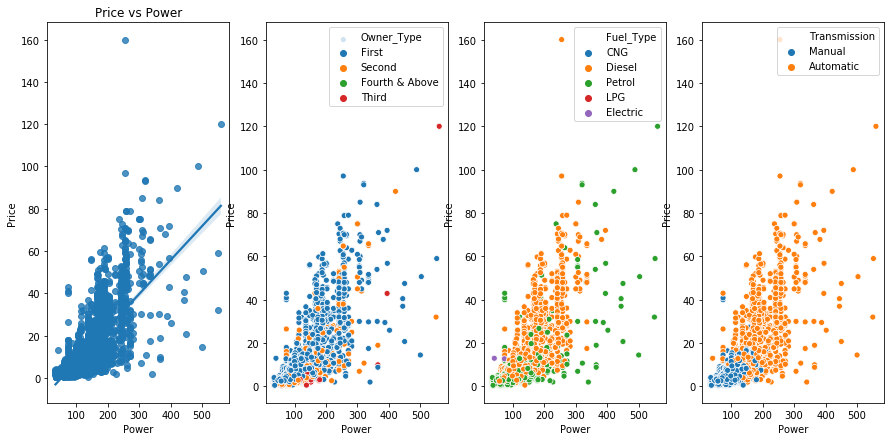

In [34]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sns.regplot(x=train_data['Power'],y=train_data['Price'])
plt.title("Price vs Power")
plt.subplot(1,4,2)
sns.scatterplot(x=train_data['Power'],y=train_data['Price'],hue=train_data['Owner_Type'])
plt.subplot(1,4,3)
sns.scatterplot(x=train_data['Power'],y=train_data['Price'],hue=train_data['Fuel_Type'])
plt.subplot(1,4,4)
sns.scatterplot(x=train_data['Power'],y=train_data['Price'],hue=train_data['Transmission'])

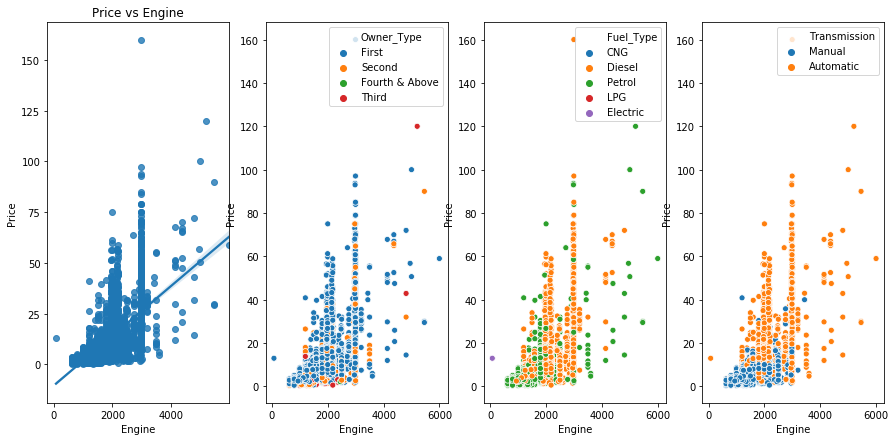

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sns.regplot(x=train_data['Engine'],y=train_data['Price'])
plt.title("Price vs Engine")
plt.subplot(1,4,2)
sns.scatterplot(x=train_data['Engine'],y=train_data['Price'],hue=train_data['Owner_Type'])
plt.subplot(1,4,3)
sns.scatterplot(x=train_data['Engine'],y=train_data['Price'],hue=train_data['Fuel_Type'])
plt.subplot(1,4,4)
sns.scatterplot(x=train_data['Engine'],y=train_data['Price'],hue=train_data['Transmission'])

# Feature Selection

Extracting important features in our dataset

In [36]:
train_data_X=train_data.loc[:, train_data.columns.isin(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Brand','Model'])]
train_data_y=train_data['Price']
train_data_X.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Brand,Model
0,Mumbai,2010,11.184421,CNG,Manual,First,Maruti,Wagon
1,Pune,2015,10.621327,Diesel,Manual,First,Hyundai,Creta
2,Chennai,2011,10.736397,Petrol,Manual,First,Honda,Jazz
3,Chennai,2012,11.373663,Diesel,Manual,First,Maruti,Ertiga
4,Coimbatore,2013,10.613246,Diesel,Automatic,Second,Audi,A4


In [37]:
train_data_y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

In [38]:
one_hot = pd.get_dummies(train_data_X['Location'],prefix='Location')
train_data_X = train_data_X.drop('Location',axis = 1)
train_data_X=train_data_X.join(one_hot)
two_hot = pd.get_dummies(train_data_X['Fuel_Type'],prefix='Fuel')
train_data_X = train_data_X.drop('Fuel_Type',axis = 1)
train_data_X=train_data_X.join(two_hot)
three_hot = pd.get_dummies(train_data_X['Owner_Type'],prefix='Owner')
train_data_X = train_data_X.drop('Owner_Type',axis = 1)
train_data_X=train_data_X.join(three_hot)
two_hot = pd.get_dummies(train_data_X['Transmission'])
train_data_X = train_data_X.drop('Transmission',axis = 1)
train_data_X=train_data_X.join(two_hot)
#two_hot = pd.get_dummies(train_data_X['Seats'],prefix='Seats')
#train_data_X = train_data_X.drop('Seats',axis = 1)
#train_data_X=train_data_X.join(two_hot)


train_data_X.head()

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,2010,11.184421,Maruti,Wagon,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,10.621327,Hyundai,Creta,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2011,10.736397,Honda,Jazz,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,2012,11.373663,Maruti,Ertiga,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,2013,10.613246,Audi,A4,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [39]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_data_X["Brand"] = lb_make.fit_transform(train_data_X["Brand"])
train_data_X["Model"] = lb_make.fit_transform(train_data_X["Model"])

In [40]:
#train_data_X=train_data_X.drop(columns=['Mileage','Engine','Power',])

In [41]:
train_data_X.columns

Index(['Year', 'Kilometers_Driven', 'Brand', 'Model', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Electric', 'Fuel_LPG',
       'Fuel_Petrol', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second',
       'Owner_Third', 'Automatic', 'Manual'],
      dtype='object')

In [42]:
train_data_X['Year']=train_data_X['Year'].apply(lambda x: 2019-x)
train_data_X.head()

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,9,11.184421,17,189,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,4,10.621327,10,53,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,8,10.736397,9,99,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,7,11.373663,17,69,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,6,10.613246,1,10,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=train_data_X.astype('int')
y=train_data_y.astype('int')

In [44]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Year,4545.106001
1,Kilometers_Driven,28.857119
2,Brand,1176.419245
3,Model,11229.538838
4,Location_Ahmedabad,78.371398
5,Location_Bangalore,141.208853
6,Location_Chennai,106.819732
7,Location_Coimbatore,394.577870
8,Location_Delhi,107.840472
9,Location_Hyderabad,61.029595


In [45]:
print(featureScores.nlargest(25,'Score'))

                  Specs         Score
3                 Model  11229.538838
0                  Year   4545.106001
24            Automatic   1944.773146
2                 Brand   1176.419245
25               Manual    777.637832
19          Fuel_Petrol    630.509888
16          Fuel_Diesel    585.549723
7   Location_Coimbatore    394.577870
23          Owner_Third    305.653755
22         Owner_Second    253.407937
11       Location_Kochi    201.514131
12     Location_Kolkata    184.048497
10      Location_Jaipur    168.915510
5    Location_Bangalore    141.208853
14        Location_Pune    132.645822
8        Location_Delhi    107.840472
6      Location_Chennai    106.819732
13      Location_Mumbai     85.841822
20          Owner_First     82.299207
4    Location_Ahmedabad     78.371398
15             Fuel_CNG     75.478571
9    Location_Hyderabad     61.029595
17        Fuel_Electric     59.568431
1     Kilometers_Driven     28.857119
18             Fuel_LPG     26.679917


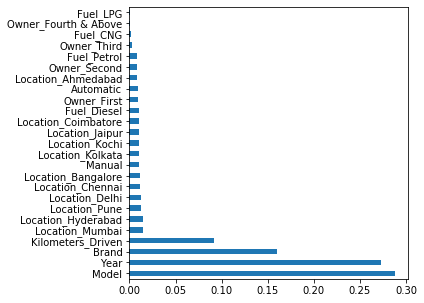

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

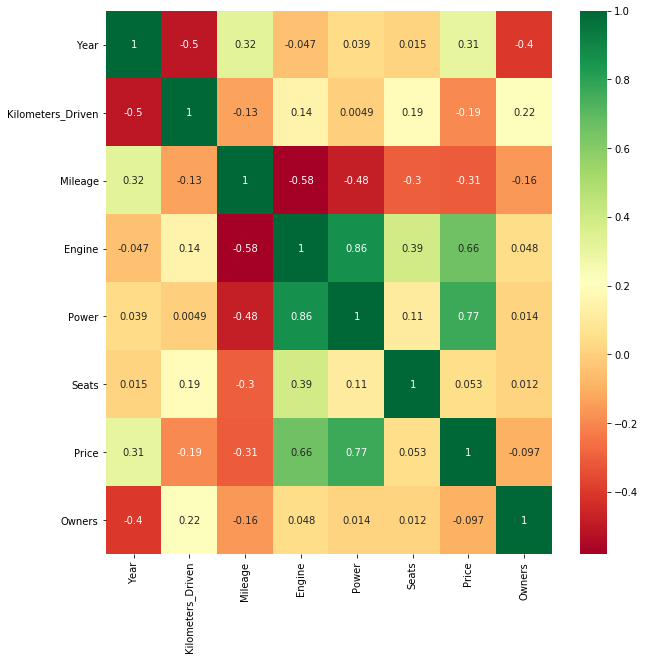

In [47]:
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [48]:
#Formating out prediction data accoriding to our training data
test_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [49]:
test_data=test_data.drop(columns=['Mileage', 'Engine', 'Power','Seats'])

In [50]:
one_hot = pd.get_dummies(test_data['Location'],prefix='Location')
test_data = test_data.drop('Location',axis = 1)
test_data=test_data.join(one_hot)
two_hot = pd.get_dummies(test_data['Fuel_Type'],prefix='Fuel')
test_data = test_data.drop('Fuel_Type',axis = 1)
test_data=test_data.join(two_hot)
three_hot = pd.get_dummies(test_data['Owner_Type'],prefix='Owner')
test_data = test_data.drop('Owner_Type',axis = 1)
test_data=test_data.join(three_hot)
two_hot = pd.get_dummies(test_data['Transmission'])
test_data = test_data.drop('Transmission',axis = 1)
test_data=test_data.join(two_hot)
#two_hot = pd.get_dummies(test_data['Seats'],prefix='Seats')
#test_data = test_data.drop('Seats',axis = 1)
#test_data=test_data.join(two_hot)
lb_make = LabelEncoder()

In [51]:
test_data['Brand']=test_data['Name'].str.split(" ",2)
x=pd.DataFrame(test_data['Brand'])
test_data['Brand']=x['Brand'].str.get(0)
test_data['Model']=x['Brand'].str.get(1)


test_data["Brand"] = lb_make.fit_transform(test_data["Brand"])
test_data["Model"] = lb_make.fit_transform(test_data["Model"])

In [52]:
test_data=test_data.drop(columns=['Name'])
test_data['Kilometers_Driven']=np.log(test_data['Kilometers_Driven'])

In [53]:
test_data['Year']=test_data['Year'].apply(lambda x: 2019-x)
test_data.head()

,Year,Kilometers_Driven,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,...,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual,Brand,Model
0,5,10.619594,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,16,16
1,6,10.905828,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,16,16
2,2,10.434116,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,26,78
3,7,11.842229,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,26,60
4,5,10.275051,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,9,159


# Data Splitting :

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, test_size = 0.2)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4814 entries, 3304 to 518
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  4814 non-null   int64  
 1   Kilometers_Driven     4814 non-null   float64
 2   Brand                 4814 non-null   int32  
 3   Model                 4814 non-null   int32  
 4   Location_Ahmedabad    4814 non-null   uint8  
 5   Location_Bangalore    4814 non-null   uint8  
 6   Location_Chennai      4814 non-null   uint8  
 7   Location_Coimbatore   4814 non-null   uint8  
 8   Location_Delhi        4814 non-null   uint8  
 9   Location_Hyderabad    4814 non-null   uint8  
 10  Location_Jaipur       4814 non-null   uint8  
 11  Location_Kochi        4814 non-null   uint8  
 12  Location_Kolkata      4814 non-null   uint8  
 13  Location_Mumbai       4814 non-null   uint8  
 14  Location_Pune         4814 non-null   uint8  
 15  Fuel_CNG           

# Model 1: Linear Regression

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred_linear = lreg.predict(X_test)
print('The Score on the train set with a linear regression is:', lreg.score(X_train,y_train))
print('The Score on the test set with a linear regression is:', lreg.score(X_test,y_test))
print("Accuracy :",lreg.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error (rmse): %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("The r2_score is: ", r2_score(y_test, y_pred_linear))

The Score on the train set with a linear regression is: 0.48273171026150447
The Score on the test set with a linear regression is: 0.4663105840721509
Accuracy : 46.63105840721509 %
Mean squared error (rmse): 8.41
The r2_score is:  0.46631058407215087


# Model 2: Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train,y_train)
y_pred_rf=regressor.predict(X_test)
print('The Score on the training set with  a Random Forest  regression is:', regressor.score(X_train,y_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',regressor.score(X_test,y_test))
print("Accuracy :",regressor.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("The r2_score is: ", r2_score(y_test, y_pred_rf))

The Score on the training set with  a Random Forest  regression is: 0.9693627237193918
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.7752064519723113
Accuracy : 77.52064519723113 %
Mean squared error: 5.46
The r2_score is:  0.7752064519723113


In [57]:
from sklearn.model_selection import RandomizedSearchCV
RFR = RandomForestRegressor()

n_estimators = [1 , 2 , 4, 8 , 16, 32, 64, 100, 200]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

best_model = rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   49.5s finished


In [58]:
best_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [59]:
rand_est = RandomForestRegressor(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 1, max_features= 'auto',max_depth=100,bootstrap=True)
rand_est.fit(X_train,y_train)
y_pred_rfr = rand_est.predict(X_test)
print(' The Score on the train set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_train,y_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

 The Score on the train set with a hyperparameter optimized random forest regressor is: 0.9398855552300126
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.7677693031040076
Mean squared error: 5.55


# Model 3: XGBoost

In [60]:
import xgboost as xgb
xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.5,max_depth = 45, alpha = 30, n_estimators = 200)
xg_reg1.fit(X_train,y_train)
preds = xg_reg1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("The r2_score is: ", r2_score(y_test,preds))
print('The Score on the train set with XGBoost is:', xg_reg1.score(X_train,y_train))
print('The Score on the test set with XGBoost is:', xg_reg1.score(X_test,y_test))
print("Accuracy :",xg_reg1.score(X_test,y_test)*100,'%')

RMSE: 4.564642
The r2_score is:  0.842862389177466
The Score on the train set with XGBoost is: 0.9669450560403307
The Score on the test set with XGBoost is: 0.842862389177466
Accuracy : 84.2862389177466 %


# Model 4: K-Neighbours

In [61]:
neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X_train,y_train)
k_pred=neigh.predict(X_test)
print('The Score on the test set with a Kneighbours  regression is:', neigh.score(X_test,y_test))
print("Accuracy :",neigh.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test,k_pred )))
print("The r2_score is: ", r2_score(y_test, k_pred))

The Score on the test set with a Kneighbours  regression is: 0.5502711891644988
Accuracy : 55.02711891644988 %
Mean squared error: 7.72
The r2_score is:  0.5502711891644988


# Model 5: Lasso Regression

In [62]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.15)
clf.fit(X_train,y_train)
lasso_predict=clf.predict(X_test)
print('The Score on the test set with a Lasso  regression is:', clf.score(X_test,y_test))
print("Accuracy :",clf.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, lasso_predict)))
print("The r2_score is: ", r2_score(y_test, lasso_predict))

The Score on the test set with a Lasso  regression is: 0.46721815525782484
Accuracy : 46.72181552578248 %
Mean squared error: 8.41
The r2_score is:  0.46721815525782484


# Model 6:SVM

In [63]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print('The Score on the test set with a Support Vector regression is:', regressor.score(X_test,y_test))
print("Accuracy :",regressor.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("The r2_score is: ", r2_score(y_test, y_pred))

The Score on the test set with a Support Vector regression is: 0.49605035968117234
Accuracy : 49.605035968117235 %
Mean squared error: 8.17
The r2_score is:  0.4960503596811724


In [64]:
#app1_test=test_data.drop(columns='Name')
app1_test=test_data
app1_test.head()

,Year,Kilometers_Driven,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,...,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual,Brand,Model
0,5,10.619594,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,16,16
1,6,10.905828,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,16,16
2,2,10.434116,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,26,78
3,7,11.842229,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,26,60
4,5,10.275051,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,9,159


In [65]:
app1_test['Fuel_Electric']=0
app1_test=app1_test[train_data_X.columns]
app1_test.columns
app2_test=app1_test
app2_test

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,5,10.619594,16,16,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,6,10.905828,16,16,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,2,10.434116,26,78,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,7,11.842229,26,60,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,5,10.275051,9,159,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,8,11.400999,27,137,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1230,4,10.985293,27,101,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1231,7,10.239960,20,91,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1232,6,10.864025,27,101,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [66]:
train_data_X.columns

Index(['Year', 'Kilometers_Driven', 'Brand', 'Model', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Electric', 'Fuel_LPG',
       'Fuel_Petrol', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second',
       'Owner_Third', 'Automatic', 'Manual'],
      dtype='object')

In [67]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(xg_reg1) 
# Load the pickled model 
xg_reg1_from_pickle = pickle.loads(saved_model) 
# Use the loaded pickled model to make predictions 
Prediction_1=xg_reg1_from_pickle.predict(app2_test.values) 

# Save the trained model as a pickle string. 
saved_model2 = pickle.dumps(rand_est) 
# Load the pickled model 
rand_est_from_pickle = pickle.loads(saved_model2) 
# Use the loaded pickled model to make predictions 
Prediction_2=rand_est_from_pickle.predict(app2_test.values)

In [68]:
prediction1=pd.DataFrame(Prediction_1)
prediction1

,0
0,1.183120
1,2.481167
2,1.320207
3,1.183120
4,2.277590
...,...
1229,1.183120
1230,5.974699
1231,1.183120
1232,6.021584


In [69]:
prediction2=pd.DataFrame(Prediction_2)
prediction2

,0
0,3.969682
1,3.988915
2,4.057059
3,3.969682
4,3.969682
...,...
1229,3.969682
1230,10.435330
1231,3.969682
1232,10.435330


In [70]:
final_data['pred_randforest'] = prediction2
final_data['pred_xgboost'] = prediction1
final_data.to_csv('D:\data.csv')

In [71]:
final_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,pred_randforest,pred_xgboost
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,3.969682,1.183120
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,3.988915,2.481167
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,4.057059,1.320207
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,3.969682,1.183120
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,3.969682,2.277590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,3.969682,1.183120
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.435330,5.974699
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.969682,1.183120
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.435330,6.021584
